In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
df = pd.read_csv("data.csv")

#SPLIT THE DATA 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df["Sentence"], df["Sentiment"], test_size=0.25, random_state=1) # 75% training and 30% test

#Importing the Decision Tree model to train

In [ ]:
from sklearn.neural_network import MLPClassifier 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


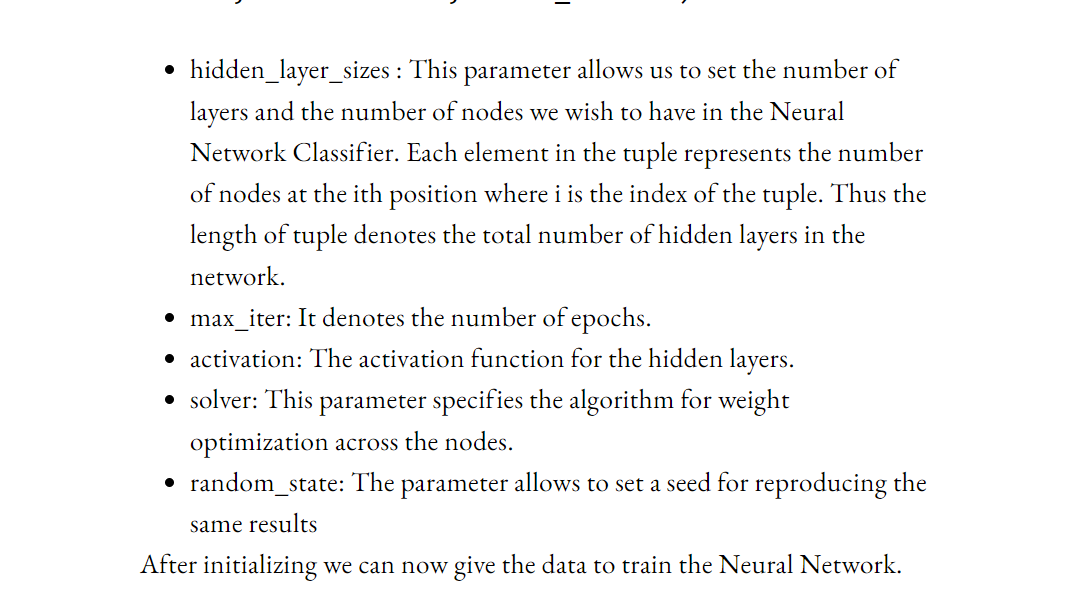

In [ ]:
#creating pipeline object which will be follow the same sequences of execution
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
pipeliner= Pipeline([("tfidf",TfidfVectorizer()),("classifier",classifier)])
pipeliner=pipeliner.fit(x_train,y_train)

#Predicting the model

In [ ]:
y_pred = pipeliner.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_test,y_pred)

0.6550308008213552

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.30      0.32      0.31       213
     neutral       0.72      0.70      0.71       780
    positive       0.72      0.73      0.72       468

    accuracy                           0.66      1461
   macro avg       0.58      0.58      0.58      1461
weighted avg       0.66      0.66      0.66      1461



# Now take input from the user and test the data weather it is positive/negative/neutral

In [ ]:
test1 = ["The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model "]
test2 = ["$ESI on lows, down $1.50 to $2.50 BK a real possibility"]
test3 = ["According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia ."]
test = ["Netflix has won the best  selection of films","Hulu has a great UI","I dislike like the new crime series","I hate waiting for the next series to come out"]

In [ ]:
print(pipeliner.predict(test1))
print(pipeliner.predict(test2))
print(pipeliner.predict(test3))
print(pipeliner.predict(test))

['positive']
['negative']
['neutral']
['positive' 'positive' 'neutral' 'neutral']


In [ ]:
import pickle
with open('Sentiment_analysis_MLP.pkl', 'wb') as handle:
  pickle.dump(pipeliner, handle, protocol=pickle.HIGHEST_PROTOCOL)